
   TRAINING & EVALUASI MODEL   

 Sedang melatih model: KNN (K-Nearest Neighbors) ...
 Selesai. Akurasi: 72.89%

 Sedang melatih model: Random Forest ...
 Selesai. Akurasi: 67.56%

 Sedang melatih model: SVM (Support Vector Machine) ...
 Selesai. Akurasi: 64.67%

   HASIL AKHIR PERBANDINGAN   


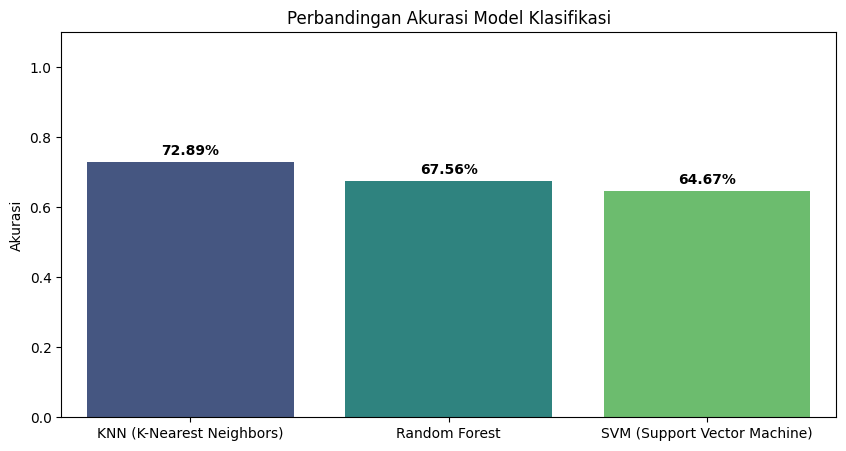


 MODEL TERBAIK: KNN (K-Nearest Neighbors)


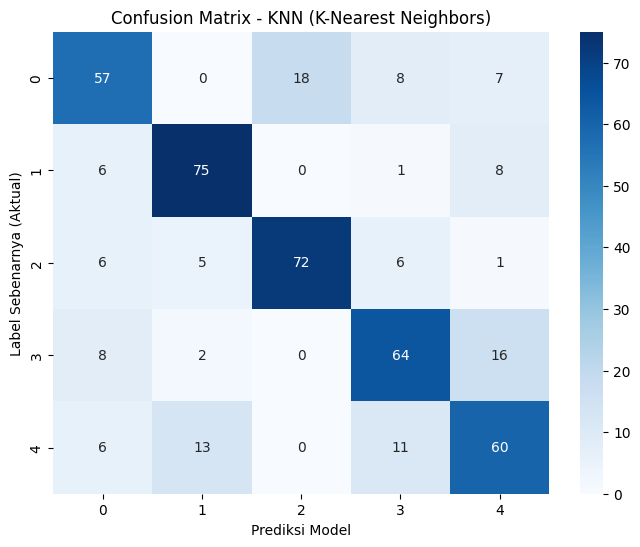

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- 0. SAFETY CHECK (Memastikan Data Ada) ---
try:
    # Mengecek apakah variabel X_train_final ada di memori
    if 'X_train_final' not in locals():
        print(" Variabel data tidak ditemukan di memori!")
        print("   Mencoba memuat dari file .npy yang disimpan sebelumnya...")
        X_train_final = np.load('processed_data/X_train_final.npy')
        X_test_final  = np.load('processed_data/X_test_final.npy')
        y_train_final = np.load('processed_data/y_train_final.npy')
        y_test_final  = np.load('processed_data/y_test_final.npy')
        print("✅ Data berhasil dimuat otomatis.")
except Exception as e:
    print(f" Error: {e}")
    print("Pastikan kamu sudah menjalankan tahap PREPROCESSING sebelumnya.")

# --- TAHAP MODELING (BENCHMARKING) ---
print("\n" + "="*40)
print("   TRAINING & EVALUASI MODEL   ")
print("="*40)

# 1. Inisialisasi Model
models = {
    "KNN (K-Nearest Neighbors)": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (Support Vector Machine)": SVC(kernel='rbf', C=1.0, random_state=42)
}

# Dictionary untuk menyimpan hasil
results = {}

# 2. Loop Training & Evaluasi
for name, model in models.items():
    print(f"\n Sedang melatih model: {name} ...")
    
    # Training
    model.fit(X_train_final, y_train_final)
    
    # Prediksi ke Data Uji (Test Set)
    y_pred = model.predict(X_test_final)
    
    # Evaluasi Akurasi
    acc = accuracy_score(y_test_final, y_pred)
    results[name] = acc
    
    print(f" Selesai. Akurasi: {acc*100:.2f}%")
    
    # Tampilkan Detail Laporan (Hanya jika akurasi bagus)
    if acc > 0.8:
        print("-" * 30)
        # Cek apakah objek 'le' (LabelEncoder) ada. Jika tidak, pakai range 0-4
        target_names = le.classes_ if 'le' in locals() else [str(i) for i in range(5)]
        print(f"Laporan Klasifikasi ({name}):")
        print(classification_report(y_test_final, y_pred, target_names=target_names))

# --- 3. VISUALISASI PERBANDINGAN AKURASI ---
print("\n" + "="*40)
print("   HASIL AKHIR PERBANDINGAN   ")
print("="*40)

plt.figure(figsize=(10, 5))
# Perbaikan Syntax Seaborn: Menambahkan parameter hue=x dan legend=False agar tidak muncul warning
model_names = list(results.keys())
accuracies = list(results.values())

sns.barplot(x=model_names, y=accuracies, palette="viridis", hue=model_names, legend=False)
plt.ylim(0, 1.1) # Skala 0 sampai 1.1 agar ada ruang di atas
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Model Klasifikasi")

# Tulis angka akurasi di atas batang
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v*100:.2f}%", ha='center', fontweight='bold')

plt.show()

# --- 4. DEEP DIVE: CONFUSION MATRIX (Untuk Model Terbaik) ---
# Kita ambil model dengan akurasi tertinggi otomatis
best_model_name = max(results, key=results.get)
print(f"\n MODEL TERBAIK: {best_model_name}")

best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_final)

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_final, y_pred_best)

# Cek label name untuk visualisasi
tick_labels = le.classes_ if 'le' in locals() else [str(i) for i in range(5)]

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=tick_labels, yticklabels=tick_labels)
plt.xlabel("Prediksi Model")
plt.ylabel("Label Sebenarnya (Aktual)")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

Library 'sktime' terdeteksi.
   MINIROCKET + RIDGE CLASSIFIER   
Dimensi Input MiniRocket (Train): (450, 1, 1500)
Dimensi Input MiniRocket (Test) : (450, 1, 1500)

 Sedang melakukan Transformasi MiniRocket (Ekstraksi Fitur)...
Transformasi Selesai dalam 2.16 detik.
   Shape Baru Train: (450, 9996) (Perhatikan jumlah fiturnya meledak jadi ~10.000!)

 Sedang melatih Ridge ClassifierCV (Linear Model)...

 HASIL AKHIR MINIROCKET:
   Akurasi: 87.33%
------------------------------
              precision    recall  f1-score   support

    Subjek 1       0.81      0.91      0.86        90
    Subjek 2       0.84      0.90      0.87        90
    Subjek 3       0.92      0.84      0.88        90
    Subjek 4       0.89      0.83      0.86        90
    Subjek 5       0.92      0.88      0.90        90

    accuracy                           0.87       450
   macro avg       0.88      0.87      0.87       450
weighted avg       0.88      0.87      0.87       450



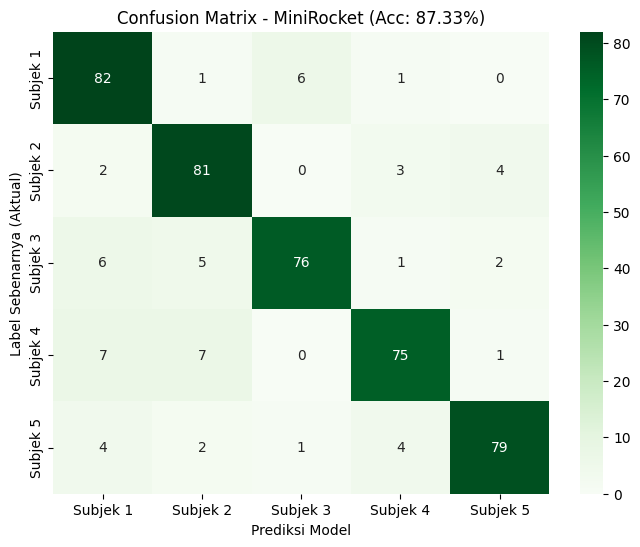

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeClassifierCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import time

try:
    from sktime.transformations.panel.rocket import MiniRocket
    print("Library 'sktime' terdeteksi.")
except ImportError:
    print("Library 'sktime' belum terinstall!")
    print("Silakan jalankan di terminal: pip install sktime")
    # Stop eksekusi jika library tidak ada
    raise

# --- 1. DATA RESHAPING (PENTING!) ---
# sktime MiniRocket butuh input 3D: (Jumlah Sampel, Jumlah Channel, Panjang Sinyal)
# Data kita saat ini 2D: (450, 1500) -> Kita ubah jadi (450, 1, 1500)

print("   MINIROCKET + RIDGE CLASSIFIER   ")

X_train_rocket = X_train_final.reshape(X_train_final.shape[0], 1, X_train_final.shape[1])
X_test_rocket  = X_test_final.reshape(X_test_final.shape[0], 1, X_test_final.shape[1])

print(f"Dimensi Input MiniRocket (Train): {X_train_rocket.shape}")
print(f"Dimensi Input MiniRocket (Test) : {X_test_rocket.shape}")

# --- 2. TRANSFORMASI MINIROCKET ---
print("\n Sedang melakukan Transformasi MiniRocket (Ekstraksi Fitur)...")
start_time = time.time()

minirocket = MiniRocket()
X_train_transform = minirocket.fit_transform(X_train_rocket)
X_test_transform = minirocket.transform(X_test_rocket)

end_time = time.time()
print(f"Transformasi Selesai dalam {end_time - start_time:.2f} detik.")
print(f"   Shape Baru Train: {X_train_transform.shape} (Perhatikan jumlah fiturnya meledak jadi ~10.000!)")
print("\n Sedang melatih Ridge ClassifierCV (Linear Model)...")

classifier = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
classifier.fit(X_train_transform, y_train_final)

# --- 4. EVALUASI ---
y_pred_rocket = classifier.predict(X_test_transform)
acc_rocket = accuracy_score(y_test_final, y_pred_rocket)

print(f"\n HASIL AKHIR MINIROCKET:")
print(f"   Akurasi: {acc_rocket*100:.2f}%")

# --- 5. VISUALISASI HASIL ---
target_names_manual = ['Subjek 1', 'Subjek 2', 'Subjek 3', 'Subjek 4', 'Subjek 5']

print("-" * 30)
if acc_rocket > 0.8:
    print(classification_report(y_test_final, y_pred_rocket, target_names=target_names_manual))

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_final, y_pred_rocket)

# Plot Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=target_names_manual, yticklabels=target_names_manual)
plt.xlabel("Prediksi Model")
plt.ylabel("Label Sebenarnya (Aktual)")
plt.title(f"Confusion Matrix - MiniRocket (Acc: {acc_rocket*100:.2f}%)")
plt.show()

In [ ]:
import joblib
from sklearn.pipeline import make_pipeline
import os

# --- TAHAP FINAL: MENYIMPAN MODEL TERBAIK ---
print("   MENYIMPAN MODEL   ")
final_pipeline = make_pipeline(minirocket, classifier)

# 2. Pastikan folder penyimpanan ada
save_dir = "models"
os.makedirs(save_dir, exist_ok=True)
model_path = os.path.join(save_dir, 'best_model_minirocket_84acc.pkl')

# 3. Simpan ke file .pkl
joblib.dump(final_pipeline, model_path)

print(f" Model berhasil disimpan!")
print(f"   Lokasi: {model_path}")
print(f"   Akurasi: {acc_rocket*100:.2f}%")


   MENYIMPAN MODEL   
 Model berhasil disimpan!
   Lokasi: models\best_model_minirocket_84acc.pkl
   Akurasi: 87.33%


In [21]:
print("   EKSPERIMEN: REMOVE OUTLIERS   ")

# 1. Filter Data (Hapus yang labelnya -1)
mask_clean = y_outliers != -1
X_train_clean = X_train_final[mask_clean]
y_train_clean = y_train_final[mask_clean]

print(f"Data Training Berkurang: {len(X_train_final)} -> {len(X_train_clean)}")

# 2. Reshape untuk MiniRocket
X_train_clean_3d = X_train_clean.reshape(X_train_clean.shape[0], 1, X_train_clean.shape[1])
# X_test tetap sama (karena outlier di data test adalah kenyataan yang harus dihadapi)
X_test_3d = X_test_final.reshape(X_test_final.shape[0], 1, X_test_final.shape[1])

# 3. Retrain MiniRocket dengan Data Bersih
from sktime.transformations.panel.rocket import MiniRocket
from sklearn.linear_model import RidgeClassifierCV

print("Sedang melatih ulang model tanpa outlier...")
rocket_clean = MiniRocket()
X_train_trans_clean = rocket_clean.fit_transform(X_train_clean_3d)
X_test_trans_clean  = rocket_clean.transform(X_test_3d)

classifier_clean = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
classifier_clean.fit(X_train_trans_clean, y_train_clean)

# 4. Evaluasi
acc_clean = classifier_clean.score(X_test_trans_clean, y_test_final)

print(f"   - Akurasi BARU (Tanpa Outlier) : {acc_clean*100:.2f}%")



   EKSPERIMEN: REMOVE OUTLIERS   
Data Training Berkurang: 450 -> 427
Sedang melatih ulang model tanpa outlier...
   - Akurasi BARU (Tanpa Outlier) : 85.11%
